In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-09-26 13:51:25.703594: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-09-26 13:51:27.921196: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 13:51:27.922035: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-09-26 13:51:28.271441: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-26 13:51:28.273993: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [8]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13256, 512, 512, 1) (13256, 512, 512, 1) (3510, 512, 512, 1) (3510, 512, 512, 1)


In [9]:
X_train, y_train, X_test, y_test = C.Helper.filter_slices(X_train, y_train, X_test, y_test)

(582, 512, 512, 1) (582, 512, 512, 1) (132, 512, 512, 1) (132, 512, 512, 1)


In [10]:
train_gen = C.Helper.augment(X_train, y_train)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [11]:
model = C.Helper.create_unet(X_train[0].shape)

2023-09-26 13:54:00.445028: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-26 13:54:00.447592: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-26 13:54:00.458202: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-09-26 13:54:00.461176: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-26 13:54:00.463628: I tensorflow/core

In [12]:
model, history = C.Helper.train_unet(train_gen, X_train, y_train, X_test, y_test, model, epochs=200)

2023-09-26 13:54:01.857019: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-09-26 13:54:01.876762: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-09-26 13:54:03.134609: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-09-26 13:54:03.741133: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-09-26 13:54:04.389724: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-09-26 13:54:04.389747: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-09-26 13:54:04.389811: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-09-26 13:54:04.481573: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-09-26 13:54:05.185683: I tensorflow/stream_exec

19/19 [==============================] - 49s 2s/step - loss: 0.2484 - iou: 6.0575e-05 - iou_thresholded: 5.8149e-04 - val_loss: 0.0639 - val_iou: 6.8236e-06 - val_iou_thresholded: 0.0035
Epoch 2/200
19/19 [==============================] - 18s 969ms/step - loss: 0.0385 - iou: 1.9837e-05 - iou_thresholded: 9.2963e-04 - val_loss: 0.0293 - val_iou: 2.1862e-05 - val_iou_thresholded: 0.0035
Epoch 3/200
19/19 [==============================] - 18s 969ms/step - loss: 0.0214 - iou: 2.8763e-05 - iou_thresholded: 8.7646e-04 - val_loss: 0.0142 - val_iou: 5.0991e-05 - val_iou_thresholded: 0.0035
Epoch 4/200
19/19 [==============================] - 18s 973ms/step - loss: 0.0101 - iou: 9.6443e-05 - iou_thresholded: 9.8434e-04 - val_loss: 0.0038 - val_iou: 2.3622e-04 - val_iou_thresholded: 0.0035
Epoch 5/200
19/19 [==============================] - 18s 966ms/step - loss: 0.0037 - iou: 4.2900e-04 - iou_thresholded: 0.0011 - val_loss: 0.0034 - val_iou: 3.9852e-04 - val_iou_thresholded: 0.0036
Epoch 6/2

19/19 [==============================] - 18s 967ms/step - loss: 6.0608e-04 - iou: 0.0645 - iou_thresholded: 0.0011 - val_loss: 9.0667e-04 - val_iou: 0.0521 - val_iou_thresholded: 0.0036
Epoch 43/200
19/19 [==============================] - 18s 965ms/step - loss: 5.8045e-04 - iou: 0.0716 - iou_thresholded: 9.6669e-04 - val_loss: 0.0012 - val_iou: 0.0400 - val_iou_thresholded: 0.0036
Epoch 44/200
19/19 [==============================] - 18s 969ms/step - loss: 6.1307e-04 - iou: 0.0692 - iou_thresholded: 0.0011 - val_loss: 0.0011 - val_iou: 0.0466 - val_iou_thresholded: 0.0036
Epoch 45/200
19/19 [==============================] - 18s 964ms/step - loss: 5.6052e-04 - iou: 0.0796 - iou_thresholded: 8.4322e-04 - val_loss: 9.9584e-04 - val_iou: 0.0525 - val_iou_thresholded: 0.0036
Epoch 46/200
19/19 [==============================] - 18s 967ms/step - loss: 5.4877e-04 - iou: 0.0824 - iou_thresholded: 9.9044e-04 - val_loss: 9.7649e-04 - val_iou: 0.0555 - val_iou_thresholded: 0.0036
Epoch 47/200
1

19/19 [==============================] - 18s 963ms/step - loss: 2.7585e-04 - iou: 0.3807 - iou_thresholded: 0.5009 - val_loss: 7.2777e-04 - val_iou: 0.1765 - val_iou_thresholded: 0.3434
Epoch 84/200
19/19 [==============================] - 18s 968ms/step - loss: 2.7629e-04 - iou: 0.3846 - iou_thresholded: 0.5125 - val_loss: 6.7106e-04 - val_iou: 0.2198 - val_iou_thresholded: 0.3269
Epoch 85/200
19/19 [==============================] - 18s 963ms/step - loss: 2.7232e-04 - iou: 0.3937 - iou_thresholded: 0.5275 - val_loss: 6.6948e-04 - val_iou: 0.2152 - val_iou_thresholded: 0.2728
Epoch 86/200
19/19 [==============================] - 18s 968ms/step - loss: 2.5830e-04 - iou: 0.3982 - iou_thresholded: 0.5214 - val_loss: 6.7411e-04 - val_iou: 0.2164 - val_iou_thresholded: 0.3292
Epoch 87/200
19/19 [==============================] - 18s 965ms/step - loss: 2.4822e-04 - iou: 0.4195 - iou_thresholded: 0.5402 - val_loss: 6.8754e-04 - val_iou: 0.2020 - val_iou_thresholded: 0.3507
Epoch 88/200
19/19

19/19 [==============================] - 18s 964ms/step - loss: 1.3120e-04 - iou: 0.6210 - iou_thresholded: 0.7133 - val_loss: 9.6314e-04 - val_iou: 0.2780 - val_iou_thresholded: 0.3774
Epoch 125/200
19/19 [==============================] - 18s 965ms/step - loss: 1.5394e-04 - iou: 0.5884 - iou_thresholded: 0.6851 - val_loss: 0.0013 - val_iou: 0.1812 - val_iou_thresholded: 0.2211
Epoch 126/200
19/19 [==============================] - 18s 968ms/step - loss: 2.2428e-04 - iou: 0.5027 - iou_thresholded: 0.6118 - val_loss: 8.6841e-04 - val_iou: 0.2124 - val_iou_thresholded: 0.2924
Epoch 127/200
19/19 [==============================] - 18s 965ms/step - loss: 2.7477e-04 - iou: 0.4508 - iou_thresholded: 0.5378 - val_loss: 0.0013 - val_iou: 0.1354 - val_iou_thresholded: 0.2679
Epoch 128/200
19/19 [==============================] - 18s 970ms/step - loss: 3.1847e-04 - iou: 0.3871 - iou_thresholded: 0.5197 - val_loss: 0.0012 - val_iou: 0.2445 - val_iou_thresholded: 0.3138
Epoch 129/200
19/19 [=====

Epoch 166/200
19/19 [==============================] - 18s 965ms/step - loss: 7.7965e-05 - iou: 0.7407 - iou_thresholded: 0.8172 - val_loss: 0.0016 - val_iou: 0.3163 - val_iou_thresholded: 0.3348
Epoch 167/200
19/19 [==============================] - 18s 969ms/step - loss: 7.5527e-05 - iou: 0.7455 - iou_thresholded: 0.8216 - val_loss: 0.0015 - val_iou: 0.3200 - val_iou_thresholded: 0.3512
Epoch 168/200
19/19 [==============================] - 18s 964ms/step - loss: 7.6044e-05 - iou: 0.7449 - iou_thresholded: 0.8213 - val_loss: 0.0016 - val_iou: 0.3281 - val_iou_thresholded: 0.3592
Epoch 169/200
19/19 [==============================] - 18s 968ms/step - loss: 7.5725e-05 - iou: 0.7507 - iou_thresholded: 0.8244 - val_loss: 0.0014 - val_iou: 0.3352 - val_iou_thresholded: 0.3661
Epoch 170/200
19/19 [==============================] - 18s 967ms/step - loss: 7.3772e-05 - iou: 0.7512 - iou_thresholded: 0.8270 - val_loss: 0.0016 - val_iou: 0.3162 - val_iou_thresholded: 0.3323
Epoch 171/200
19/19 

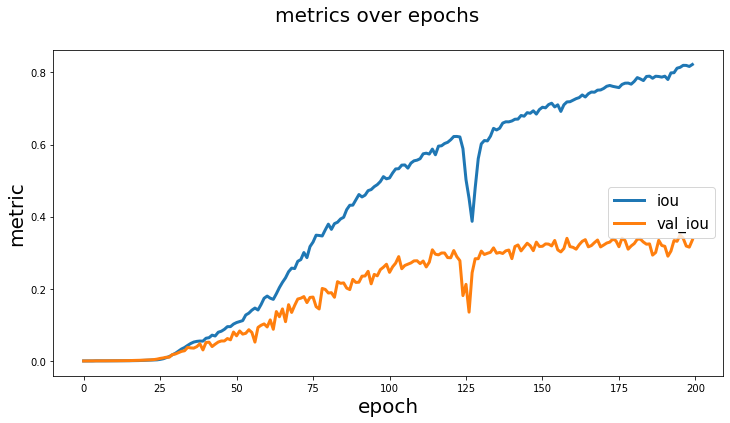

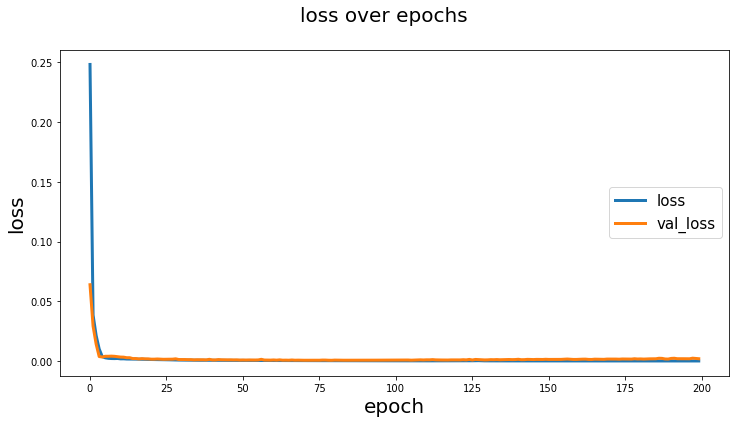

In [13]:
C.Helper.visualize_graph(history)

In [14]:
y_pred = C.Helper.prediction(X_test, model)

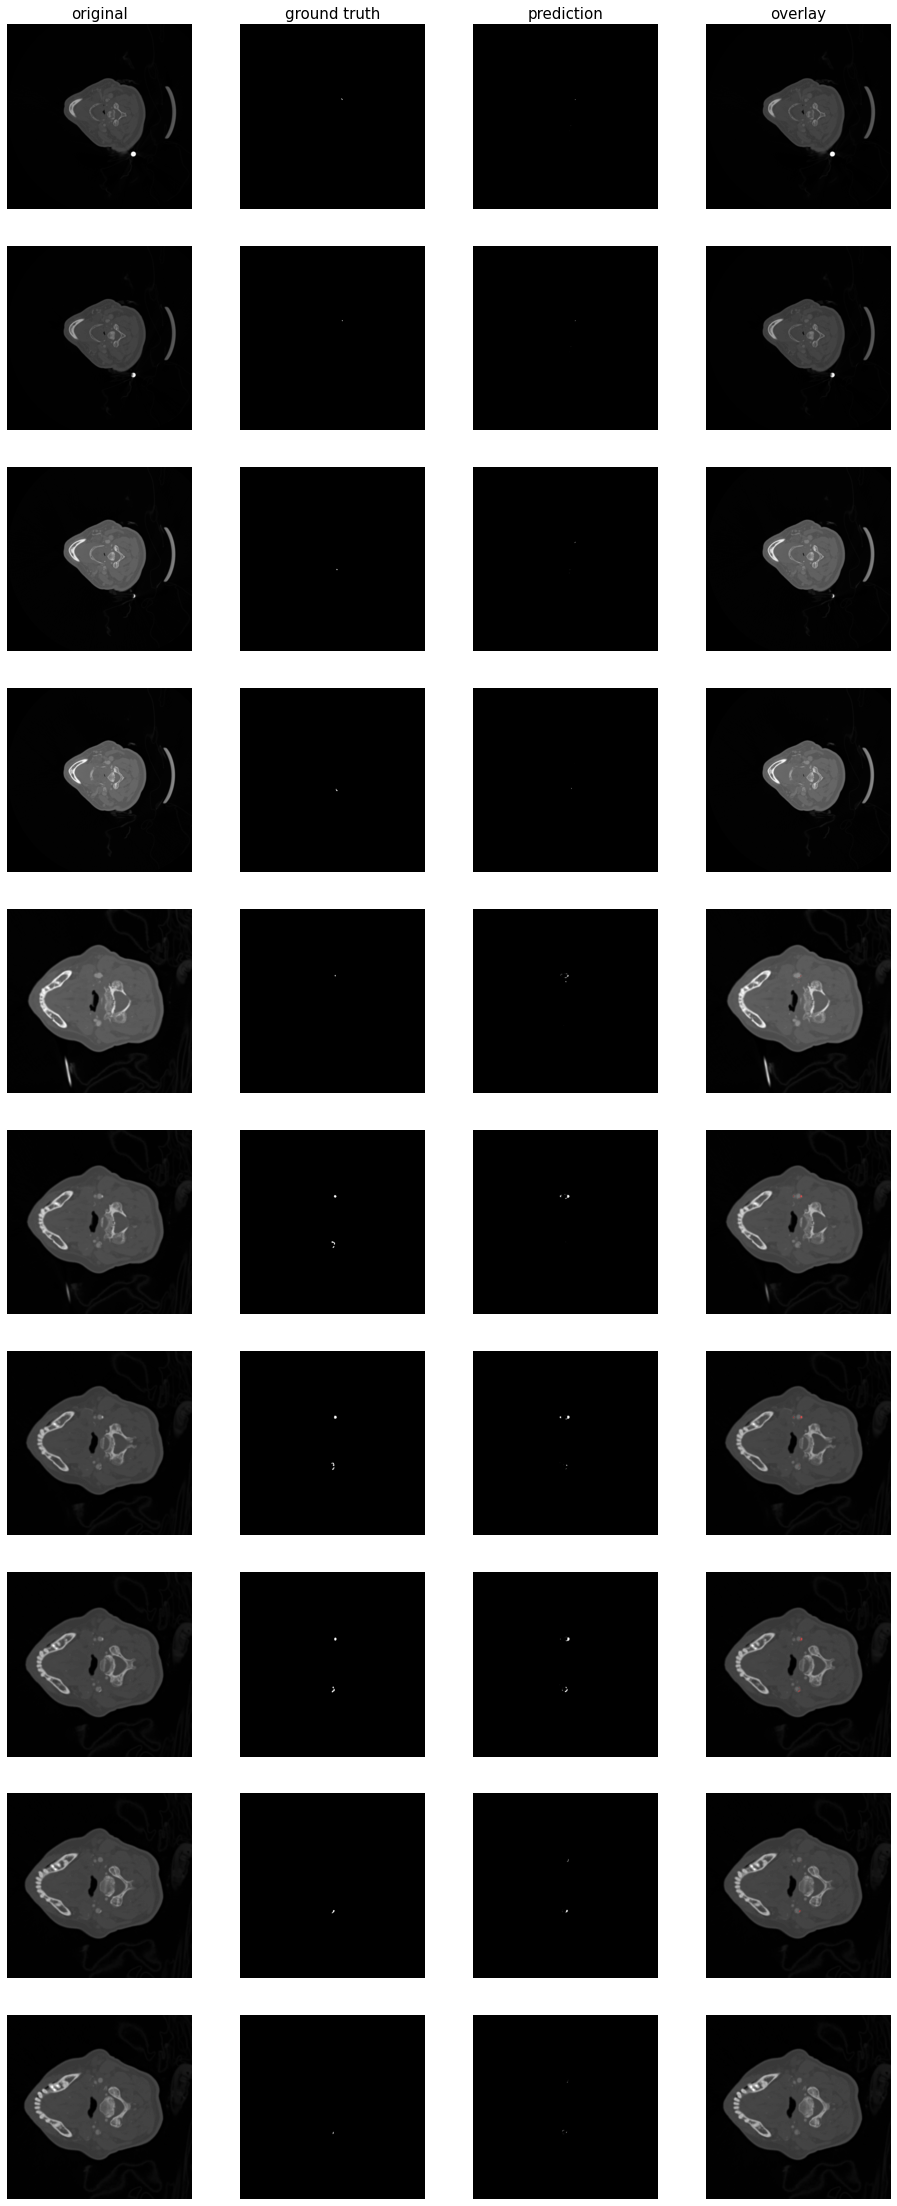

In [15]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [16]:
C.Helper.evaluate(X_test, y_test, model)

5/5 [==============================] - 1s 173ms/step - loss: 0.0019 - iou: 0.3352 - iou_thresholded: 0.3486
